In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg
import matplotlib.pyplot as plt
import collections
from sklearn.metrics import mean_squared_error

In [ ]:
datos=pd.read_csv("Libro1.csv",sep=";")
datos

,cnt,season,mnth,weekday,workingday,weathersit,yr,instant,holiday,temp,atemp,hum,windspeed,casual,registered,dteday
0,985,1,1,6,0,2,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654,1/1/2011
1,801,1,1,0,0,2,0,2,0,0.363478,0.353739,0.696087,0.248539,131,670,2/1/2011
2,1349,1,1,1,1,1,0,3,0,0.196364,0.189405,0.437273,0.248309,120,1229,3/1/2011
3,1562,1,1,2,1,1,0,4,0,0.200000,0.212122,0.590435,0.160296,108,1454,4/1/2011
4,1600,1,1,3,1,1,0,5,0,0.226957,0.229270,0.436957,0.186900,82,1518,5/1/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2114,1,12,4,1,2,1,727,0,0.254167,0.226642,0.652917,0.350133,247,1867,27/12/2012
727,3095,1,12,5,1,2,1,728,0,0.253333,0.255046,0.590000,0.155471,644,2451,28/12/2012
728,1341,1,12,6,0,2,1,729,0,0.253333,0.242400,0.752917,0.124383,159,1182,29/12/2012
729,1796,1,12,0,0,1,1,730,0,0.255833,0.231700,0.483333,0.350754,364,1432,30/12/2012


In [ ]:
datos=datos.drop(['instant','dteday','casual','registered'], axis=1)
datos

,cnt,season,mnth,weekday,workingday,weathersit,yr,holiday,temp,atemp,hum,windspeed
0,985,1,1,6,0,2,0,0,0.344167,0.363625,0.805833,0.160446
1,801,1,1,0,0,2,0,0,0.363478,0.353739,0.696087,0.248539
2,1349,1,1,1,1,1,0,0,0.196364,0.189405,0.437273,0.248309
3,1562,1,1,2,1,1,0,0,0.200000,0.212122,0.590435,0.160296
4,1600,1,1,3,1,1,0,0,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2114,1,12,4,1,2,1,0,0.254167,0.226642,0.652917,0.350133
727,3095,1,12,5,1,2,1,0,0.253333,0.255046,0.590000,0.155471
728,1341,1,12,6,0,2,1,0,0.253333,0.242400,0.752917,0.124383
729,1796,1,12,0,0,1,1,0,0.255833,0.231700,0.483333,0.350754


In [ ]:
categorico=['season','mnth','weekday','workingday','weathersit','yr']
numerico=['cnt']
listos=['holiday','temp','atemp','hum','windspeed']
preprocesador = make_column_transformer(    
    (StandardScaler(),numerico),(OneHotEncoder(),categorico),('passthrough',listos)
    )
DataSet=preprocesador.fit_transform(datos)
nombres = preprocesador.transformers_[1][1].get_feature_names(categorico)
numerico.extend(nombres)
numerico.extend(listos)
DatasetPreprocesado = pd.DataFrame(data=DataSet,columns=numerico)
DatasetPreprocesado.head()

,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1,holiday,temp,atemp,hum,windspeed
0,-1.817953,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.344167,0.363625,0.805833,0.160446
1,-1.912999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.363478,0.353739,0.696087,0.248539
2,-1.629925,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.196364,0.189405,0.437273,0.248309
3,-1.519898,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.200000,0.212122,0.590435,0.160296
4,-1.500269,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.226957,0.229270,0.436957,0.186900


In [ ]:
correlacion=DatasetPreprocesado.corr()

In [ ]:
aux=correlacion['cnt']
aux=aux.drop(['cnt'])
aux.sort_values(ascending=False)

atemp           0.631066
temp            0.627494
yr_1            0.566710
season_3        0.346487
weathersit_1    0.252870
mnth_6          0.195866
mnth_9          0.194963
mnth_8          0.182426
mnth_7          0.166584
season_2        0.146197
mnth_5          0.132947
mnth_10         0.109273
season_4        0.065593
workingday_1    0.061156
weekday_5       0.039118
weekday_4       0.034273
weekday_6       0.009773
weekday_3       0.009297
weekday_2       0.001328
mnth_4         -0.003004
weekday_1      -0.035166
mnth_11        -0.039723
weekday_0      -0.058288
workingday_0   -0.061156
holiday        -0.068348
hum            -0.100659
mnth_3         -0.127705
weathersit_2   -0.172879
mnth_12        -0.173065
windspeed      -0.234545
weathersit_3   -0.239958
mnth_2         -0.277764
mnth_1         -0.366090
season_1       -0.563094
yr_0           -0.566710
Name: cnt, dtype: float64

In [ ]:
x = DatasetPreprocesado.drop(['cnt'], axis=1)
y = DatasetPreprocesado['cnt']

In [ ]:
reg = LinearRegression()
reg.fit(x, y)
pred=reg.predict(x)
metrics.r2_score(y, pred)

0.8468807135468077

In [ ]:
Y=[]
for n in y:
  if n>=np.mean(DatasetPreprocesado['cnt']):
    Y.append("yes")
  else:
    Y.append("no")

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(x, Y, test_size=0.20, random_state=1, shuffle=True)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_validation, predictions))

0.8843537414965986


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[74  8]
 [ 9 56]]


In [ ]:
DatasetPreprocesado.shape

(731, 36)

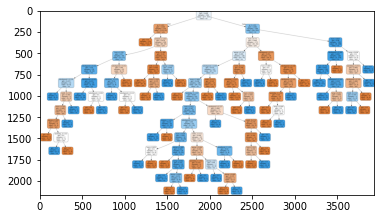

In [ ]:
data = tree.export_graphviz(model, out_file=None, feature_names=DatasetPreprocesado.columns.values[1:36], class_names=["yes", "no"], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

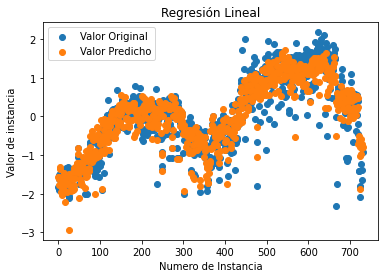

In [ ]:
plt.scatter(range(0,731),y)
plt.scatter(range(0,731),pred)
plt.legend(["Valor Original", "Valor Predicho"])
plt.xlabel('Numero de Instancia')
plt.ylabel('Valor de instancia')
plt.title('Regresión Lineal')
plt.savefig("regLin.png")
plt.show()

In [ ]:
collections.Counter(Y)

Counter({'no': 359, 'yes': 372})

In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

          no       0.89      0.90      0.90        82
         yes       0.88      0.86      0.87        65

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



In [ ]:
mean_squared_error(y, pred)

0.15311928645319234